# **`DSML_WS_13` - Clustering Task**

Today is the final workshop of the DSML course. Since we do not have any new concepts to implement, the only bit that is left is discussing the final preparation task.

## 1. **Clustering breast cancer samples**

In the last workshop, we have illustrated k-means clustering using the iris flower dataset. Put what you have learned into practice by applying it to our known cancer dataset. Focus only on a selected subset of features: ``radius_mean``, ``texture_mean``, ``concavity_mean``, and ``smoothness_mean``. Would you have chosen the true number of 2 clusters without knowing that there are only two cancer types? Do the following:
- load and prepare data (including feature scaling)
- Run k-means for different values of k using the selected features
- select the most suitable k using the elbow method
- re-train your model using your selected number for k
- Generate two scatterplots: one showing the true label, and one showing your generated clusters (using the first two selected features for x and y)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# load data
cancer = pd.read_csv('breast_cancer.csv', index_col="id")
cancer.dropna(axis=1, inplace=True)

# use only selected features
selected_features = ["radius_mean", "texture_mean", "concavity_mean", "smoothness_mean"]
cancer_selected = cancer[selected_features]

cancer_selected

,radius_mean,texture_mean,concavity_mean,smoothness_mean
id,,,,
842302,17.99,10.38,0.30010,0.11840
842517,20.57,17.77,0.08690,0.08474
84300903,19.69,21.25,0.19740,0.10960
84348301,11.42,20.38,0.24140,0.14250
84358402,20.29,14.34,0.19800,0.10030
...,...,...,...,...
926424,21.56,22.39,0.24390,0.11100
926682,20.13,28.25,0.14400,0.09780
926954,16.60,28.08,0.09251,0.08455


In [4]:
# standardize features
scaler = StandardScaler()
cancer_scaled = pd.DataFrame(scaler.fit_transform(cancer_selected),
                             columns=selected_features,
                             index=cancer.index)

cancer_scaled

,radius_mean,texture_mean,concavity_mean,smoothness_mean
id,,,,
842302,1.097064,-2.073335,2.652874,1.568466
842517,1.829821,-0.353632,-0.023846,-0.826962
84300903,1.579888,0.456187,1.363478,0.942210
84348301,-0.768909,0.253732,1.915897,3.283553
84358402,1.750297,-1.151816,1.371011,0.280372
...,...,...,...,...
926424,2.110995,0.721473,1.947285,1.041842
926682,1.704854,2.085134,0.693043,0.102458
926954,0.702284,2.045574,0.046588,-0.840484


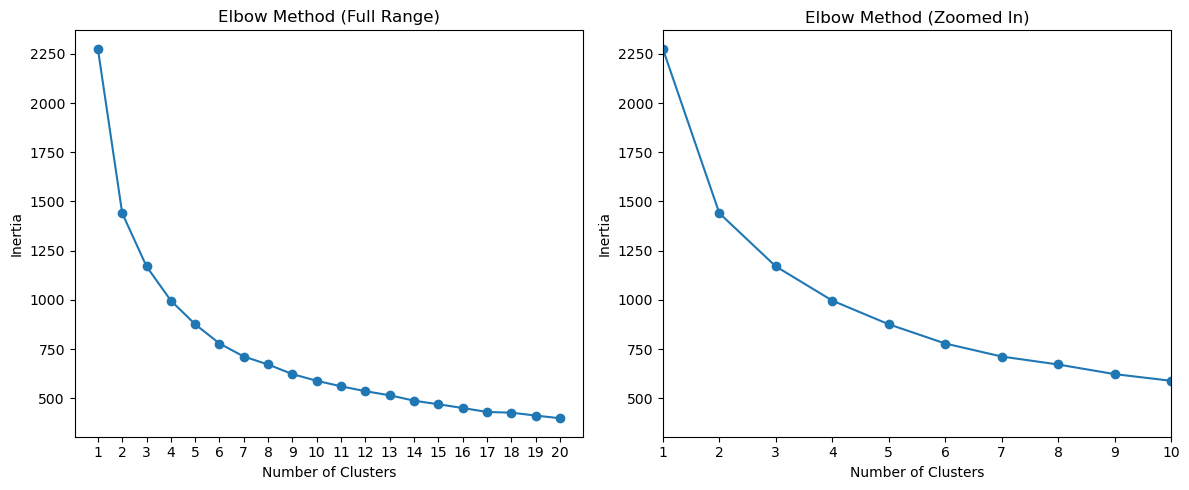

In [5]:
# determine number of clusters via elbow method
clusters = []
losses = []

for i in range(20):
    model = KMeans(n_clusters=i+1, n_init=10)
    model.fit(cancer_scaled)
    clusters.append(i+1)
    losses.append(model.inertia_)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Full elbow plot
axes[0].plot(clusters, losses, marker='o')
axes[0].set_xticks(range(1, 21))
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Inertia")
axes[0].set_title("Elbow Method (Full Range)")

# Zoomed-in elbow plot
axes[1].plot(clusters, losses, marker='o')
axes[1].set_xlim([1, 10])
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Inertia")
axes[1].set_title("Elbow Method (Zoomed In)")

plt.tight_layout()
plt.show()

In [6]:
# train model for chosen n clusters (i.e., 2)
n=2
model_final  = KMeans(n_clusters=n, n_init=10)
model_final.fit(cancer_scaled)

KMeans(n_clusters=2, n_init=10)

In [7]:
# prepare dataframe for plotting
cancer_scaled["Cluster"] = model_final.predict(cancer_scaled)
cancer_scaled["Diagnosis"] = cancer["diagnosis"]

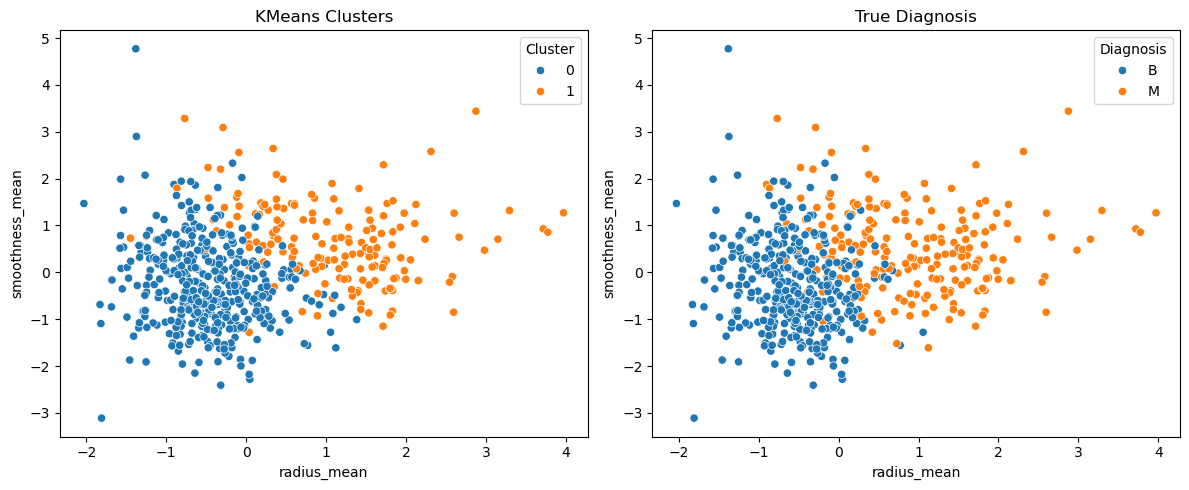

In [9]:
# Set up figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x="radius_mean", y="smoothness_mean",
                hue="Cluster", data=cancer_scaled,
                ax=axes[0])                                # Plot 1: KMeans Clusters
axes[0].set_title("KMeans Clusters")

sns.scatterplot(x="radius_mean", y="smoothness_mean",
                hue="Diagnosis", data=cancer_scaled,
                hue_order=["B", "M"], ax=axes[1])
axes[1].set_title("True Diagnosis")                        # Plot 2: True Diagnosis Labels

plt.tight_layout()
plt.show()

# Features: radius_mean, texture_mean, concavity_mean, smoothness_mean